 pip install mxnet --no-deps

In [3]:
%matplotlib inline

width = 6
height = 3
import matplotlib
matplotlib.rcParams['figure.figsize'] = [width, height]

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## utilities
import os

## deep learning module
import mxnet as mx

## data processing
import numpy as np
import pandas as pd

## reporting
#import perf
from scipy.stats import pearsonr, spearmanr

In [4]:
## some hyperparameters we won't tune via command line inputs
DATA_SEGMENTS    = { 'tr': 0.6, 'va': 0.2, 'tst': 0.2}
THRESHOLD_EPOCHS = 2
COR_THRESHOLD    =  0.005

## temporal slicing
WIN              = 24 ##* 7
H                = 3

## model details 
MODEL            = 'rnn_model'
SZ_FILT          = 8
N_FILT           = 10
RNN_UNITS        = 10
SEASONAL_PERIOD  = 24

## training details
GPU              = 0
BATCH_N          = 1024
LR               = 0.0001
DROP             = 0.2
N_EPOCHS         = 30

## data details
DATA_FILE        = 'electricity.txt'
SAVE_DIR         = "resultsDir"

In [10]:
elec = pd.read_csv('electricity.diff.txt')

In [11]:
elec.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V312,V313,V314,V315,V316,V317,V318,V319,V320,V321
0,4,23,78,141,77,307,0,262,45,75,...,129,80,15100.0,-76,1615,17,9,619,71,673
1,3,4,0,4,-20,-123,0,-77,-1,-40,...,12,-22,1400.0,-358,-46,-1,-4,16,-35,-71
2,-1,-4,0,-117,-59,-395,-5,-192,-91,-89,...,-16,-139,-2100.0,-63,-206,1,-4,-878,-23,-29
3,2,-1,0,-97,-23,-198,-8,-100,7,-32,...,6,-12,-3200.0,-106,-67,10,1,63,-4,-14
4,-2,1,-125,-6,-12,-6,2,-7,-2,-2,...,-5,110,-4300.0,143,-750,-11,-1,-128,-6,21


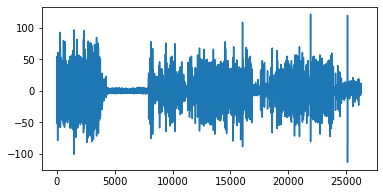

In [14]:
plt.plot(elec.V1)